# IMDB Movie Review Sentiment Classification Dataset

This is a dataset of 25,000 movies reviews from IMDB, labelled by sentiment (Positive/Negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers. For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

https://keras.io/api/datasets/imdb/

In [14]:
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.datasets import imdb

pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.

In [15]:
# Only consider the top 20k words

max_words = 20000

# Only consider the first 80 words of each movie review
max_len = 80

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = pad_sequences(X_train, maxlen=max_len, padding='pre', truncating='pre')
X_test = pad_sequences(X_test, maxlen=max_len)

In [16]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (25000, 80)
y_train shape:  (25000,)


In [17]:
#%tensorflow_version 1.x

In [18]:
# get_word_index function

import tensorflow as tf
tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [19]:
X_train

array([[   15,   256,     4, ...,    19,   178,    32],
       [  125,    68,     2, ...,    16,   145,    95],
       [  645,   662,     8, ...,     7,   129,   113],
       ...,
       [  529,   443, 17793, ...,     4,  3586,     2],
       [  286,  1814,    23, ...,    12,     9,    23],
       [   97,    90,    35, ...,   204,   131,     9]], dtype=int32)

In [9]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

In [10]:
# Define Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, Bidirectional

model = Sequential()

#Embed each integer in a 128-dimensional vector
model.add(Embedding(max_words, 128))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

An LSTM Network is a type of Recurrent Neural Network(RNN) that can learn long-term dependencies between time steps of sequence data. A word embedding layer maps a squence of word indices to embedding vectors and learns the word embedding during training.

LSTM, GRU, Bidirectional, SimpleRNN layer

LSTM & Bidirectional layer is useful.

Embedding layer is useful when you are dealing with word datasets in NLP domain.

NOTE: You can try a bunch more stuffs, including adding more SimpleRNNs with LSTMs.

In [11]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [12]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 24s 91ms/step - loss: 0.4974 - acc: 0.7424 - val_loss: 0.4397 - val_acc: 0.7982
Epoch 2/10
250/250 [==============================] - 19s 75ms/step - loss: 0.2672 - acc: 0.8915 - val_loss: 0.3679 - val_acc: 0.8374
Epoch 3/10
250/250 [==============================] - 20s 81ms/step - loss: 0.1674 - acc: 0.9354 - val_loss: 0.5527 - val_acc: 0.7884
Epoch 4/10
250/250 [==============================] - 19s 76ms/step - loss: 0.1110 - acc: 0.9577 - val_loss: 0.4706 - val_acc: 0.8152
Epoch 5/10
250/250 [==============================] - 20s 78ms/step - loss: 0.0948 - acc: 0.9661 - val_loss: 0.6516 - val_acc: 0.8222
Epoch 6/10
250/250 [==============================] - 19s 76ms/step - loss: 0.0600 - acc: 0.9787 - val_loss: 0.9223 - val_acc: 0.8115
Epoch 7/10
250/250 [==============================] - 20s 78ms/step - loss: 0.0463 - acc: 0.9843 - val_loss: 0.8692 - val_acc: 0.8167
Epoch 8/10
250/250 [==============================] - 19s 75ms

In [20]:
# Define Model 2
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, Bidirectional

model = Sequential()

#Embed each integer in a 128-dimensional vector
model.add(Embedding(max_words, 128))
model.add(SimpleRNN(32, activation='relu'))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ValueError: ignored

In [21]:
# Define Model 3
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, Bidirectional

model = Sequential()

#Embed each integer in a 128-dimensional vector
model.add(Embedding(max_words, 128))
model.add(SimpleRNN(32, activation='relu'), return_sequence=True)
model.add(SimpleRNN(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

TypeError: ignored

In [ ]:
# Define Model 4
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, Bidirectional

model = Sequential()

#Embed each integer in a 128-dimensional vector
model.add(Embedding(max_words, 128))
model.add(LSTM(64, activation='relu'))
model.add(SimpleRNN(32, activation='relu'))
model.add(SimpleRNN(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

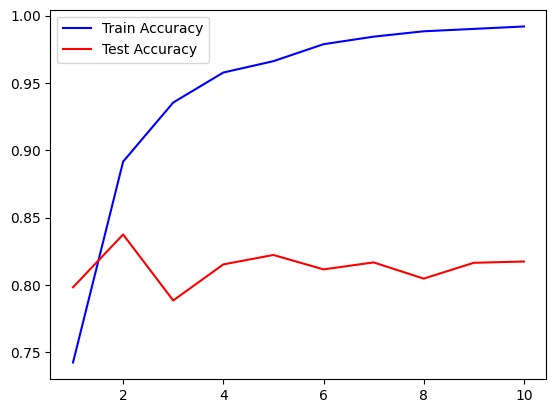

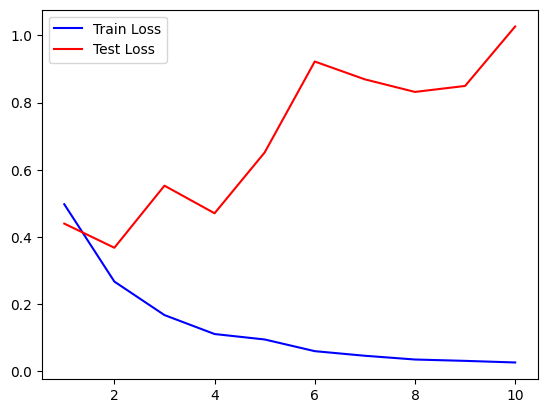

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()